Select dataset D1,D2,D3D1
Let us see our chosen dataset
     Sr. No.     X1         X2 Class
0          1  717.5  43.897280    C2
1          2  702.5  49.715525    C2
2          3  587.5  32.777671    C2
3          4  272.5   5.732092    C1
4          5  477.5  36.249146    C2
..       ...    ...        ...   ...
295      296  562.5  34.467092    C2
296      297  715.0  30.833468    C2
297      298  515.0  30.139598    C2
298      299  122.5   7.420273    C1
299      300  335.0  14.865559    C1

[300 rows x 4 columns]
The dataset is a set of 300 points in 2D cordinate system
Now let us visually represnt and analyse the data
Here is the data is visual form


Text(0.5, 0, 'X1')

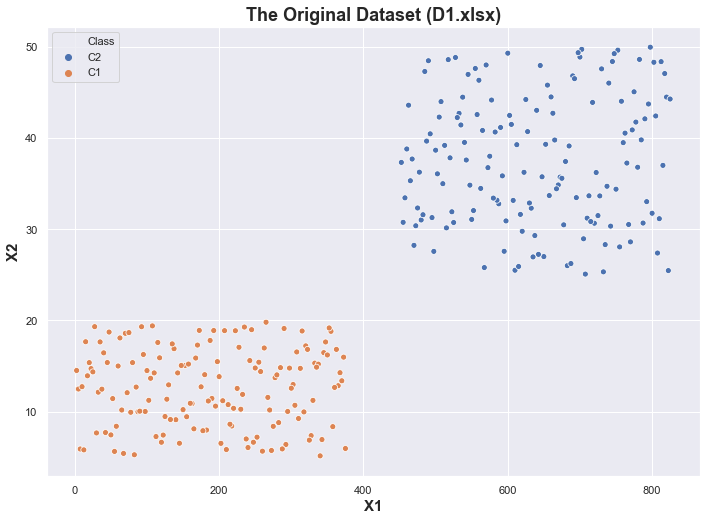

In [45]:
#import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

#take input from user
i=input("Select dataset D1,D2,D3")
name=i
assert i in ['D1','D2','D3']

#show the dataset
print("Let us see our chosen dataset")
time.sleep(0.5)
dataset=pd.read_excel(i+'.xlsx')
print(dataset)
time.sleep(1)
#edit the print statement below*
print("The dataset is a set of "+str(len(dataset))+" points in 2D cordinate system")
#show the graph of the dataset
time.sleep(1)
print("Now let us visually represnt and analyse the data")
print("Here is the data is visual form")
sns.set(rc={'figure.figsize':(11.7,8.27)})
b=sns.scatterplot(data=dataset,x="X1",y="X2",hue="Class")
b.set_title("The Original Dataset ("+name+".xlsx)",fontsize=18,fontweight="bold")
b.set_ylabel("X2",fontweight="bold",fontsize=15)
b.set_xlabel("X1",fontweight="bold",fontsize=15)

In [46]:
#define class datapoint
class Datapoint:
    def __init__(self,x1,x2,Class):
        self.x1=x1
        self.x2=x2
        self.Class=Class

In [47]:
#classification check in original basis
data=[]
for i in dataset.index:
    obj=Datapoint(dataset.iloc[i]["X1"],dataset.iloc[i]["X2"],dataset.iloc[i]["Class"])
    data.append(obj)

The data can be classified when projected along x1 by a separator along x2


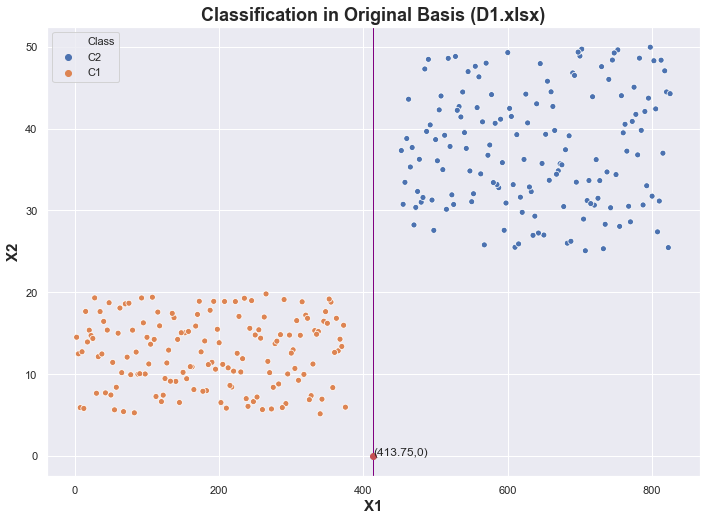

In [74]:
#classify check along projection on x1 in original basis
data.sort(key=lambda a:a.x1)
first_class=None
along_x1_original=False
c1_count=0
c2_count=0
for i in data:
    if i.Class=="C1":
        c1_count+=1
    if i.Class=="C2":
        c2_count+=1
(c1_count,c2_count)
stack=[]
for i in data:
    if len(stack)==0:
        stack.append(i)
        first_class=i.Class
    elif stack[-1].Class!=i.Class:
        break
    elif stack[-1].Class==i.Class:
        stack.append(i)
fcount=None
if first_class=="C1":
    fcount=c1_count
else:
    fcount=c2_count
if fcount==len(stack):
    print("The data can be classified when projected along x1 by a separator along x2")
    along_x1_original=True
    b=sns.scatterplot(data=dataset,x="X1",y="X2",hue="Class")
    b.set_title("Classification in Original Basis ("+name+".xlsx)",fontsize=18,fontweight="bold")
    b.set_ylabel("X2",fontweight="bold",fontsize=15)
    b.set_xlabel("X1",fontweight="bold",fontsize=15)
    x1_f=data[len(stack)].x1
    x1_b=data[len(stack)-1].x1
    x1_p=(x1_f+x1_b)/2
    plt.axvline(x=x1_p,linewidth=1,color='purple')
    plt.plot([x1_p],[0],'ro')
    labels="("+str(x1_p)+",0)"
    plt.text(x1_p,0,labels)
else:
    print("The data cannot be classified when projected along x1 by a separator along x2")

150
The data can be classified when projected along x2 by a separator along x1


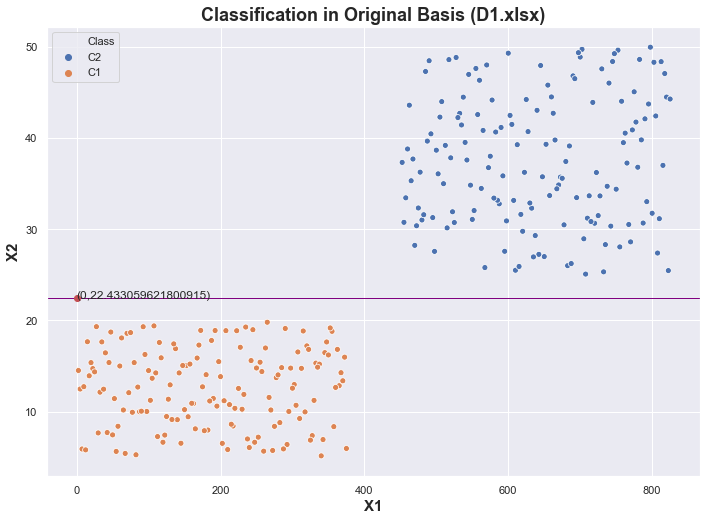

In [83]:
#classify check along projection on x2 in original basis
data.sort(key=lambda a:a.x2)
first_class=None
along_x2_original=False
c1_count=0
c2_count=0
for i in data:
    if i.Class=="C1":
        c1_count+=1
    if i.Class=="C2":
        c2_count+=1
print(c1_count)
stack=[]
for i in data:
    if len(stack)==0:
        stack.append(i)
        first_class=i.Class
    elif stack[-1].Class!=i.Class:
        break
    elif stack[-1].Class==i.Class:
        stack.append(i)
fcount=None
if first_class=="C1":
    fcount=c1_count
else:
    fcount=c2_count
if fcount==len(stack):
    print("The data can be classified when projected along x2 by a separator along x1")
    along_x2_original=True
    b=sns.scatterplot(data=dataset,x="X1",y="X2",hue="Class")
    b.set_title("Classification in Original Basis ("+name+".xlsx)",fontsize=18,fontweight="bold")
    b.set_ylabel("X2",fontweight="bold",fontsize=15)
    b.set_xlabel("X1",fontweight="bold",fontsize=15)
    y1_f=data[len(stack)].x2
    y1_b=data[len(stack)-1].x2
    y1_p=(y1_f+y1_b)/2
    plt.axhline(y=y1_p,linewidth=1,color='purple')
    plt.plot([0],[y1_p],'ro')
    labels="(0,"+str(y1_p)+")"
    plt.text(0,y1_p,labels)
else:
    print("The data cannot be classified when projected along x2 by a separator along x1")

In [15]:
#check classification in eigen basis

In [ ]:
#visualise in eigen basis